In [ ]:
import requests, json
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pylab as plt

### SF Open Data
    - Guide: https://data.sfgov.org/developers
    - Getting Data
    https://data.sfgov.org/Public-Safety/SFPD-Incidents-from-1-January-2003/tmnf-yvry
    - JSON Response: https://data.sfgov.org/resource/tmnf-yvry.json

In [ ]:
url = "https://data.sfgov.org/resource/tmnf-yvry.json"
r = requests.get(url)
print r.status_code

In [ ]:
type(r)

In [ ]:
print len(r.content)

In [ ]:
print type(r.content)

In [6]:
print r.content[:100]

[ {
  "date" : "2016-10-22T00:00:00",
  "address" : "FILLMORE ST / GREENWICH ST",
  "resolution" : "


In [8]:
data = json.loads(r.content)

In [9]:
print type(data)
print type(data[1])

<type 'list'>
<type 'dict'>


In [11]:
data[1].keys()

[u'dayofweek',
 u'incidntnum',
 u'time',
 u'descript',
 u'pddistrict',
 u'y',
 u'location',
 u'address',
 u'date',
 u'x',
 u'category',
 u'resolution',
 u'pdid']

In [13]:
data[1]['descript']

u'PROPERTY FOR IDENTIFICATION'

In [14]:
df = pd.DataFrame(data)

In [15]:
df.head(2)

,address,category,date,dayofweek,descript,incidntnum,location,pddistrict,pdid,resolution,time,x,y
0,FILLMORE ST / GREENWICH ST,LARCENY/THEFT,2016-10-22T00:00:00,Saturday,PETTY THEFT OF PROPERTY,166237234,"{u'latitude': u'37.7989514142851', u'needs_rec...",NORTHERN,16623723406372,NONE,23:45,-122.435870220186,37.7989514142851
1,1000 Block of POTRERO AV,NON-CRIMINAL,2016-10-22T00:00:00,Saturday,PROPERTY FOR IDENTIFICATION,160862356,"{u'latitude': u'37.7564864109309', u'needs_rec...",MISSION,16086235673000,NONE,23:30,-122.406539115148,37.7564864109309


In [16]:
df['category'].value_counts()

LARCENY/THEFT                  229
OTHER OFFENSES                 115
ASSAULT                        107
NON-CRIMINAL                    96
VEHICLE THEFT                   81
VANDALISM                       57
SUSPICIOUS OCC                  49
BURGLARY                        48
WARRANTS                        41
DRUG/NARCOTIC                   38
ROBBERY                         24
MISSING PERSON                  22
SECONDARY CODES                 22
WEAPON LAWS                     18
FRAUD                           14
TRESPASS                         9
STOLEN PROPERTY                  6
DRUNKENNESS                      5
SEX OFFENSES, FORCIBLE           5
ARSON                            3
DISORDERLY CONDUCT               2
RECOVERED VEHICLE                2
DRIVING UNDER THE INFLUENCE      2
BAD CHECKS                       1
FORGERY/COUNTERFEITING           1
FAMILY OFFENSES                  1
EXTORTION                        1
RUNAWAY                          1
Name: category, dtyp

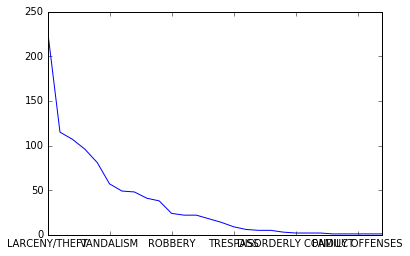

In [17]:
df['category'].value_counts().plot()